# Old Collection Access Pattern

The non-typed way of accessing xAOD collections is supported for now, but is depreciated, and eventually, will stop working. There isn't a lot different from the typed method. However, much less of the xAOD is defined, so watch out for holes.

In [1]:
from func_adl_servicex import ServiceXSourceXAOD, SXLocalxAOD
import matplotlib.pyplot as plt
from pathlib import Path

local_xaod_path = Path(r"C:\Users\gordo\Code\atlas\data\xAODSampleFiles\DAOD_EXOT15.26710781._000001.pool.root.1")
if not local_xaod_path.exists():
    local_xaod_path = Path(r"C:\Users\gordo\Code\atlas\xAODSampleData\DAOD_EXOT15.26710781._000001.pool.root.1")
rucio_zee_r21_mc = 'rucio://mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00'

In [2]:
# ds = ServiceXSourceXAOD(rucio_zee_r21_mc, backend='xaod_r21')
ds = SXLocalxAOD(local_xaod_path)

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


In [3]:
jets = (ds
          .SelectMany(lambda e: (e.Jets("AntiKt4EMTopoJets")))
          .Where(lambda j: (j.pt()/1000)>30)
          .Select(lambda j: (j.pt()/1000.0))
          .AsPandasDF("JetPt")
          .value())

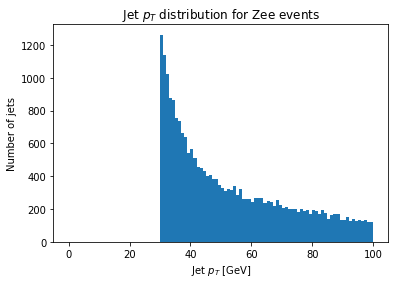

In [4]:
plt.hist(jets.JetPt, bins=100, range=(0, 100))
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')
_ = plt.title('Jet $p_T$ distribution for Zee events')